# Public/Private LB Score Progress
Output a CSV(lb.csv) containing Public/Private LB Score and submit date and time.

In [ ]:
import math
import numpy as np
import pandas as pd
import plotly.express as px
from pathlib import Path

ROOT_PATH = Path('../input/meta-kaggle')

# Set your TEAM_NAME and COMP_NAME

Store the competition name and the team name for which you want to retrieve the LBscore in their respective variables ( COMP_NAME/TEAM_NAME).

## How to get a competition name

Copy the strings displayed on the competition page.
(e.g. https://www.kaggle.com/c/elo-merchant-category-recommendation)

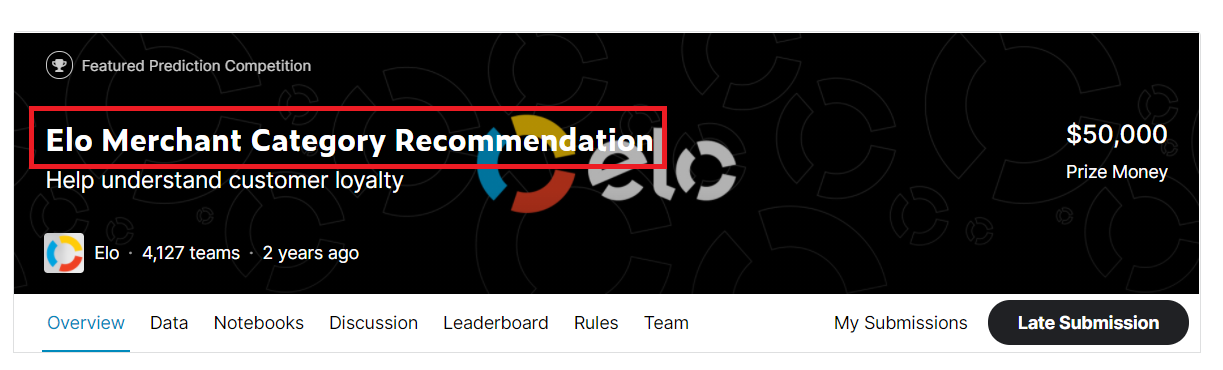

## How to get a team name

Copy the strings displayed on the team page.
(e.g. https://www.kaggle.com/c/elo-merchant-category-recommendation/team)

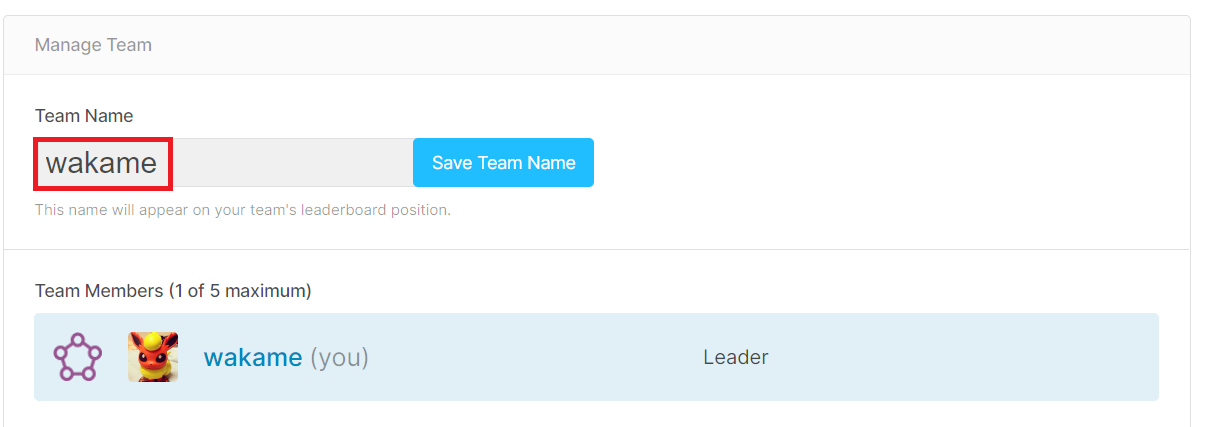

In [ ]:
TEAM_NAME = 'wakame'
COMP_NAME = 'Elo Merchant Category Recommendation'

In [ ]:
def get_competition_id(competition_name):
    competitions = pd.read_csv(ROOT_PATH / 'Competitions.csv')
    c = competitions[competitions['Title'].str.contains(competition_name)]
    competition_id = c['Id'].iloc[0]
    return competition_id

def get_teams_df(competition_id):
    teams = pd.read_csv(ROOT_PATH / 'Teams.csv')
    teams.rename(columns={'Id':'TeamId'}, inplace=True)
    teams = teams[teams['CompetitionId'] == competition_id]
    return teams

def get_submission_df():
    submissions = pd.read_csv(ROOT_PATH /'Submissions.csv')
    submissions.rename(columns={'Id':'SubmissionId'}, inplace=True)
    return submissions

def get_team_id(teams, team_name):
    team_id = teams[teams['TeamName'] == team_name]['TeamId'].iloc[0]
    return team_id

def get_specific_team_name_score(competition_name, team_name):
    competition_id = get_competition_id(competition_name)
    teams = get_teams_df(competition_id)
    submissions = get_submission_df()
    
    df = pd.merge(submissions, teams, how='inner', on='TeamId')
    team_id = get_team_id(teams, team_name)
    use_cols = ['SubmissionDate', 'ScoreDate', 'IsAfterDeadline', 
                'PublicScoreFullPrecision', 'PrivateScoreFullPrecision',
                'ScoreFirstSubmittedDate', 'LastSubmissionDate', 
                'IsBenchmark', 'Medal', 'MedalAwardDate',
                'PublicScoreLeaderboardDisplay', 'PrivateScoreLeaderboardDisplay',
                'PublicLeaderboardRank', 'PrivateLeaderboardRank']
    
    return df[df['TeamId'] == team_id][use_cols]

In [ ]:
df = get_specific_team_name_score(COMP_NAME, TEAM_NAME)

# Column Meaning

|  Column_name  |  Meaning  |
| ---- | ---- |
|  SubmissionDate  |  Submission date |
|  ScoreDate  |  Same meaning as SubmissionDate  |
|  ScoreFirstSubmittedDate  |  -  |
|  LastSubmissionDate  |  - |
|  MedalAwardDate  |  Medal granting date |
|  IsAfterDeadline  |  Whether to post after the deadline  |
|  PublicScoreFullPrecision  |  Actual score  |
|  PrivateScoreFullPrecision  |  Actual score  |
|  PublicScoreLeaderboardDisplay  |  The score shown in LB  |
|  PrivateScoreLeaderboardDisplay  |  The score shown in LB  |
|  PublicLeaderboardRank  |  LB's rank  |
|  PrivateLeaderboardRank  |  LB's rank  |

In [ ]:
display(df)

In [ ]:
df.to_csv('lb.csv')

In [ ]:
use_cols = ['SubmissionDate', 'PublicScoreFullPrecision', 'PrivateScoreFullPrecision', 'IsAfterDeadline']
df = df[use_cols]

In [ ]:
df['SubmissionDate'] = pd.to_datetime(df['SubmissionDate'])
df_on_comp = df[df['IsAfterDeadline'] != True].sort_values(by=['SubmissionDate'])

In [ ]:
display(df_on_comp)

# Plot Public/Private LB Score Progress

In [ ]:
px.line(df_on_comp,
        x='SubmissionDate',
        y=['PublicScoreFullPrecision', 'PrivateScoreFullPrecision'])

In [ ]:
competition_id = get_competition_id(COMP_NAME)
teams = get_teams_df(competition_id)
submissions = get_submission_df()

df = pd.merge(submissions, teams, how='inner', on='TeamId')

In [ ]:
display(df.head())

In [ ]:
competitions = pd.read_csv(ROOT_PATH / 'Competitions.csv')

In [ ]:
c = competitions[competitions['Title'].str.contains(COMP_NAME)]
competition_id = c['Id'].iloc[0]

In [ ]:
total_teams = competitions[competitions['Id'] == competition_id]['TotalTeams'].iloc[0]

In [ ]:
# https://www.kaggle.com/progression
if 0 < total_teams < 99:
    rules = {'bronze': 0.4 , 'silver': 0.2, 'gold': 0.1}
elif 100 < total_teams < 249:
    rules = {'bronze': 0.4 , 'silver': 0.2, 'gold': 10}
elif 250 < total_teams < 999:
    rules = {'bronze': 100 , 'silver': 50, 'gold': 10 + total_teams // 500}
elif 1000 <= total_teams:
    rules = {'bronze': 0.1 , 'silver': 0.05, 'gold': 10 + total_teams // 500}
else:
    raise ValueError('')

In [ ]:
def get_medal_place(_total_teams, rule):
    medal_place = math.floor(_total_teams * rule) if isinstance(rule, float) else rule
    return medal_place

bronze = get_medal_place(total_teams, rules['bronze'])
silver = get_medal_place(total_teams, rules['silver'])
gold = get_medal_place(total_teams, rules['gold'])

In [ ]:
print(bronze, silver, gold)

In [ ]:
df[df['PrivateLeaderboardRank'] == bronze]

In [ ]:
df.columns